# Learning Objectives:
After doing this Notebook exercises, I'll have know how to do the following:

Read a .csv file into a pandas DataFrame.
Examine a dataset.
Experiment with different features in building a model.
Tune the model's hyperparameters.


# The Dataset
The dataset for this exercise is based on 1990 census data from California. The dataset is old but still provides a great opportunity to learn about machine learning programming

In [1]:
# Import relevant modules
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [2]:
# Import the dataset from the URL.
training_data = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

# Scale the label.
training_data["median_house_value"] /= 1000.0

# Print the first rows of the pandas DataFrame.
training_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5


In [3]:
# Get statistics on the dataset.
training_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


In [14]:
# Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
# Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

# Describe the topography of the model.
# The topography of a simple linear regression model
# is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

# Compile the model topography into code that TensorFlow can efficiently
# execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

return model        


def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs. 
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)

# Gather the trained model's weight and bias.
trained_weight = model.get_weights()[0]
trained_bias = model.get_weights()[1]

# The list of epochs is stored separately from the rest of history.
epochs = history.epoch
  
# Isolate the error for each epoch.
hist = pd.DataFrame(history.history)

# To track the progression of training, we're going to take a snapshot
# of the model's root mean squared error at each epoch. 
rmse = hist["root_mean_squared_error"]

return trained_weight, trained_bias, epochs, rmse

print("Defined the create_model and traing_model functions.")

SyntaxError: 'return' outside function (<ipython-input-14-1b28cbf06275>, line 19)

In [5]:
# Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

# Label the axes.
plt.xlabel(feature)
plt.ylabel(label)

# Create a scatter plot from 200 random points of the dataset.
random_examples = training_data.sample(n=200)
plt.scatter(random_examples[feature], random_examples[label])

# Create a red line representing the model. The red line starts
# at coordinates (x0, y0) and ends at coordinates (x1, y1).
x0 = 0
y0 = trained_bias
x1 = 10000
y1 = trained_bias + (trained_weight * x1)
plt.plot([x0, x1], [y0, y1], c='r')

# Render the scatter plot and the red line.
plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()  

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


Epoch 1/30
567/567 [==============================] - 0s 571us/step - loss: 221281.5312 - root_mean_squared_error: 470.4057
Epoch 2/30
567/567 [==============================] - 0s 572us/step - loss: 27972.2109 - root_mean_squared_error: 167.2489
Epoch 3/30
567/567 [==============================] - 0s 559us/step - loss: 27385.3066 - root_mean_squared_error: 165.4851
Epoch 4/30
567/567 [==============================] - 0s 562us/step - loss: 26365.7285 - root_mean_squared_error: 162.3753
Epoch 5/30
567/567 [==============================] - 0s 564us/step - loss: 25592.8027 - root_mean_squared_error: 159.9775
Epoch 6/30
567/567 [==============================] - 0s 561us/step - loss: 24836.8555 - root_mean_squared_error: 157.5971
Epoch 7/30
567/567 [==============================] - 0s 564us/step - loss: 24457.1777 - root_mean_squared_error: 156.3879
Epoch 8/30
567/567 [==============================] - 0s 553us/step - loss: 23714.2949 - root_mean_squared_error: 153.9945
Epoch 9/30
567/

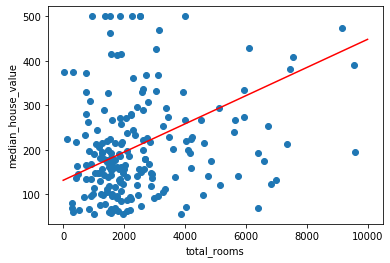

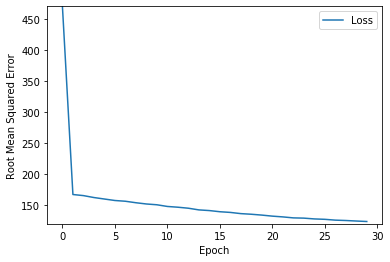

In [6]:
# Calling the model functions. The following variables are the hyperparameters.
# Use total_rooms as a single feature
learning_rate = 0.01
epochs = 30
batch_size = 30

# Specify the feature and the label.
my_feature = "total_rooms"  # the total number of rooms on a specific city block.
my_label="median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on total_rooms.  

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_data, 
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [7]:
# Use the model to make predictions

def predict_house_values(n, feature, label):
  """Predict house values based on a feature."""

batch = training_data[feature][10000:10000 + n]
predicted_values = my_model.predict_on_batch(x=batch)

print("feature   label          predicted")
print("  value   value          value")
print("          in thousand$   in thousand$")
print("--------------------------------------")
for i in range(n):
print ("%5.0f %6.0f %15.0f" % (training_data[feature][10000 + i],
                                   training_data[label][10000 + i],
                                   predicted_values[i][0] ))

In [8]:
# Predicted Values
predict_house_values(10, my_feature, my_label)

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1960     53             194
 3400     92             239
 3677     69             248
 2202     62             201
 2403     80             208
 5652    295             311
 3318    500             237
 2552    342             212
 1364    118             175
 3468    128             241


Epoch 1/3
142/142 [==============================] - 0s 592us/step - loss: 549271.0000 - root_mean_squared_error: 741.1282
Epoch 2/3
142/142 [==============================] - 0s 576us/step - loss: 441103.9688 - root_mean_squared_error: 664.1566
Epoch 3/3
142/142 [==============================] - 0s 572us/step - loss: 495452.3438 - root_mean_squared_error: 703.8837


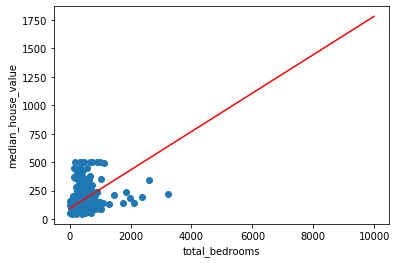

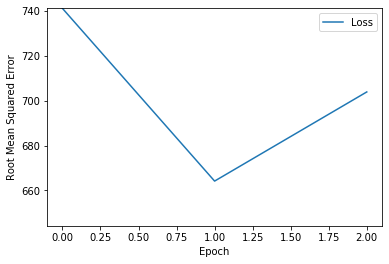

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
  393     53             161
  618     92             199
  863     69             240
  471     62             174
  483     80             176
 1313    295             316
  441    500             169
  443    342             169
  282    118             142
  675    128             209
  363    187             156
  166     80             123
 1075    112             276
  741     95             220
  663     69             207


In [9]:
# Try a different feature to see if it will have a greater predictive power

my_feature = "total_bedrooms"   # Replace the ? with population or possibly
                   # a different column name.

# Experiment with the hyperparameters.
learning_rate = 2
epochs = 3
batch_size = 120

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_data, 
                                         my_feature, my_label,
                                         epochs, batch_size)
plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

predict_house_values(15, my_feature, my_label)

Epoch 1/18
5667/5667 [==============================] - 3s 600us/step - loss: 31700.3379 - root_mean_squared_error: 178.0459
Epoch 2/18
5667/5667 [==============================] - 3s 577us/step - loss: 20372.4922 - root_mean_squared_error: 142.7322 1s - loss: 21079.1309 - root_mean_squ
Epoch 3/18
5667/5667 [==============================] - 3s 561us/step - loss: 18473.3906 - root_mean_squared_error: 135.9169
Epoch 4/18
5667/5667 [==============================] - 3s 582us/step - loss: 17998.3574 - root_mean_squared_error: 134.1580
Epoch 5/18
5667/5667 [==============================] - 3s 554us/step - loss: 18152.0312 - root_mean_squared_error: 134.7295
Epoch 6/18
5667/5667 [==============================] - 3s 558us/step - loss: 18184.9434 - root_mean_squared_error: 134.8516
Epoch 7/18
5667/5667 [==============================] - 3s 559us/step - loss: 18141.6250 - root_mean_squared_error: 134.6909
Epoch 8/18
5667/5667 [==============================] - 3s 554us/step - loss: 17793.640

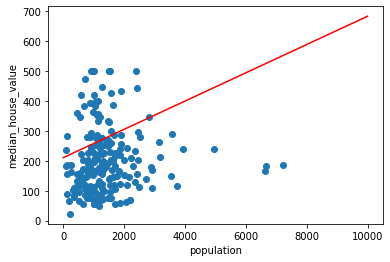

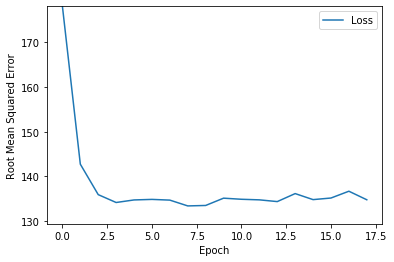

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1286     53             271
 1867     92             299
 2191     69             314
 1052     62             260
 1647     80             288
 2312    295             320
 1604    500             286
 1066    342             261
  338    118             226
 1604    128             286


In [10]:
# A new feature for more predictive power.

my_feature = "population" # Pick a feature other than "total_rooms"

# Possibly, experiment with the hyperparameters.
learning_rate = 0.05
epochs = 18
batch_size = 3

# Don't change anything below.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_data, 
                                         my_feature, my_label,
                                         epochs, batch_size)

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

predict_house_values(10, my_feature, my_label)

 Training is not entirely deterministic, but population 
 typically converges at a slightly higher RMSE than 
 total_rooms.  So, population appears to be about 
 the same or slightly worse at making predictions 
 than total_rooms.

Epoch 1/7
1134/1134 [==============================] - 1s 648us/step - loss: 16050.7900 - root_mean_squared_error: 126.6917
Epoch 2/7
1134/1134 [==============================] - 1s 559us/step - loss: 13465.8633 - root_mean_squared_error: 116.0425
Epoch 3/7
1134/1134 [==============================] - 1s 567us/step - loss: 13466.5215 - root_mean_squared_error: 116.0453
Epoch 4/7
1134/1134 [==============================] - 1s 560us/step - loss: 13471.7949 - root_mean_squared_error: 116.0681
Epoch 5/7
1134/1134 [==============================] - 1s 548us/step - loss: 13470.0908 - root_mean_squared_error: 116.0607
Epoch 6/7
1134/1134 [==============================] - 1s 569us/step - loss: 13470.8584 - root_mean_squared_error: 116.0640
Epoch 7/7
1134/1134 [==============================] - 1s 565us/step - loss: 13470.6963 - root_mean_squared_error: 116.0633


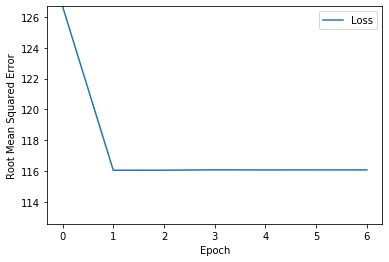

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    1     53             204
    1     92             204
    1     69             204
    1     62             204
    1     80             204
    1    295             204
    1    500             204
    1    342             204
    1    118             204
    1    128             204
    1    187             204
    1     80             204
    1    112             204
    1     95             204
    1     69             204


In [11]:
# Define a synthetic feature named rooms_per_person
training_data["rooms_per_person"] = 1 # write your code here.

# Don't change the next line.
my_feature = "rooms_per_person"

# Assign values to these three hyperparameters.
learning_rate = 0.5
epochs = 7
batch_size = 15

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_data,
                                         my_feature, my_label,
                                         epochs, batch_size)

plot_the_loss_curve(epochs, rmse)
predict_house_values(15, my_feature, my_label)

Epoch 1/24
567/567 [==============================] - 0s 547us/step - loss: 39081.7969 - root_mean_squared_error: 197.6912
Epoch 2/24
567/567 [==============================] - 0s 582us/step - loss: 19313.0801 - root_mean_squared_error: 138.9715
Epoch 3/24
567/567 [==============================] - 0s 567us/step - loss: 15117.7373 - root_mean_squared_error: 122.9542
Epoch 4/24
567/567 [==============================] - 0s 549us/step - loss: 14731.6475 - root_mean_squared_error: 121.3740
Epoch 5/24
567/567 [==============================] - 0s 567us/step - loss: 14535.4268 - root_mean_squared_error: 120.5630
Epoch 6/24
567/567 [==============================] - 0s 550us/step - loss: 14421.1240 - root_mean_squared_error: 120.0880
Epoch 7/24
567/567 [==============================] - 0s 563us/step - loss: 14254.9580 - root_mean_squared_error: 119.3941
Epoch 8/24
567/567 [==============================] - 0s 569us/step - loss: 14142.9385 - root_mean_squared_error: 118.9241
Epoch 9/24
567/5

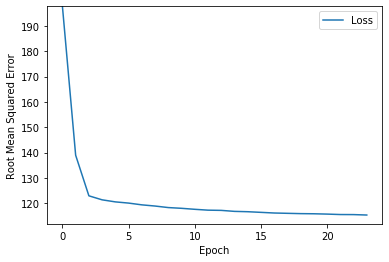

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    2     53             190
    2     92             201
    2     69             196
    2     62             212
    1     80             187
    2    295             225
    2    500             211
    2    342             223
    4    118             286
    2    128             214
    2    187             224
    3     80             234
    2    112             225
    2     95             219
    2     69             211


In [12]:
# Define a synthetic feature
training_data["rooms_per_person"] = training_data["total_rooms"] / training_data["population"]
my_feature = "rooms_per_person"

# Tune the hyperparameters.
learning_rate = 0.06
epochs = 24
batch_size = 30

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, mae = train_model(my_model, training_data,
                                        my_feature, my_label,
                                        epochs, batch_size)

plot_the_loss_curve(epochs, mae)
predict_house_values(15, my_feature, my_label)


In [13]:
# Generate a correlation matrix.
training_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_person
longitude,1.0,-0.9,-0.1,0.0,0.1,0.1,0.1,-0.0,-0.0,-0.1
latitude,-0.9,1.0,0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,0.1
housing_median_age,-0.1,0.0,1.0,-0.4,-0.3,-0.3,-0.3,-0.1,0.1,-0.1
total_rooms,0.0,-0.0,-0.4,1.0,0.9,0.9,0.9,0.2,0.1,0.1
total_bedrooms,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,-0.0,0.0,0.0
population,0.1,-0.1,-0.3,0.9,0.9,1.0,0.9,-0.0,-0.0,-0.1
households,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,0.0,0.1,-0.0
median_income,-0.0,-0.1,-0.1,0.2,-0.0,-0.0,0.0,1.0,0.7,0.2
median_house_value,-0.0,-0.1,0.1,0.1,0.0,-0.0,0.1,0.7,1.0,0.2
rooms_per_person,-0.1,0.1,-0.1,0.1,0.0,-0.1,-0.0,0.2,0.2,1.0


The median_income correlates 0.7 with the label 
(median_house_value), so median_income might be a 
good feature. The other seven potential features
all have a correlation relatively close to 0. 

If time permits, try median_income as the feature
and see whether the model improves.